# –ü—Ä–∞–∫—Ç–∏—á–µ—Å–∫–æ–µ –î–ó 1. –£–¥–∞–ª–µ–Ω–∏–µ —Ñ–æ–Ω–∞ —Å –ø–æ–º–æ—â—å—é SVD

–í —ç—Ç–æ–π –∑–∞–¥–∞—á–µ –º—ã –ø–æ–∑–Ω–∞–∫–æ–º–∏–º—Å—è —Å –æ–¥–Ω–∏–º –∏–∑ –≤–æ–∑–º–æ–∂–Ω—ã—Ö –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–π —Å–∏–Ω–≥—É–ª—è—Ä–Ω–æ–≥–æ —Ä–∞–∑–ª–æ–∂–µ–Ω–∏—è &mdash; —É–¥–∞–ª–µ–Ω–∏–µ —Ñ–æ–Ω–∞ –∏–∑ –≤–∏–¥–µ–æ.
–î–ª—è —ç—Ç–æ–≥–æ —Å–Ω–∞—á–∞–ª–∞ –∑–∞–≥—Ä—É–∑–∏–º –≤–∏–¥–µ–æ, –Ω–∞ –∫–æ—Ç–æ—Ä–æ–º –µ—Å—Ç—å –¥–≤–∏–∂—É—â–∏–µ—Å—è –æ–±—ä–µ–∫—Ç—ã –∏ –Ω–µ–∏–∑–º–µ–Ω–Ω—ã–π —Ñ–æ–Ω.


**–ó–∞–º–µ—á–∞–Ω–∏–µ: –¥–∞–ª–µ–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —Ü–∏–∫–ª–∞–º–∏ –∑–∞–ø—Ä–µ—â–µ–Ω–æ, –µ—Å–ª–∏ —ç—Ç–æ —è–≤–Ω–æ –Ω–µ –ø—Ä–æ–ø–∏—Å–∞–Ω–æ –≤ –∑–∞–¥–∞–Ω–∏–∏. –í–º–µ—Å—Ç–æ —ç—Ç–æ–≥–æ –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ —Ñ—É–Ω–∫—Ü–∏–∏ numpy.**

In [1]:
%pip install -q moviepy==1.0.3
%pip install -q ffmpeg

  Preparing metadata (setup.py) ... done


In [2]:
import moviepy.editor as mpe
video = mpe.VideoFileClip("data/SVD_video_1.mp4")
video.ipython_display(width=300, maxduration=250)

  if event.key is 'enter':



Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


–ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ –∏ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏–º –≤–∏–¥–µ–æ –≤ –≤–∏–¥–µ —Ç—Ä–µ—Ö–º–µ—Ä–Ω–æ–≥–æ –º–∞—Å—Å–∏–≤–∞ —Ä–∞–∑–º–µ—Ä–æ–≤ `(#–∫–∞–¥—Ä–æ–≤) x (#–ø–∏–∫—Å–µ–ª–µ–π –ø–æ –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª–∏) x (#–ø–∏–∫—Å–µ–ª–µ–π –ø–æ –≤–µ—Ä—Ç–∏–∫–∞–ª–∏)`.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
video.fps

23.976023976023978

In [5]:
def video_to_array(video):
    duration = int(video.duration)
    nframes = int(video.fps * video.duration)
    size_w, size_h = video.size
    arr = np.zeros([nframes, size_h, size_w])
    for i in range(nframes):
        arr[i, :, :] = video.get_frame(i/nframes * duration)[:, :, 0].astype(float)
    print('image size: {1:} x {2:}, \nnumber of frames: {0:}'.format(nframes, size_w, size_h))
    return arr

image size: 80 x 60, 
number of frames: 2883


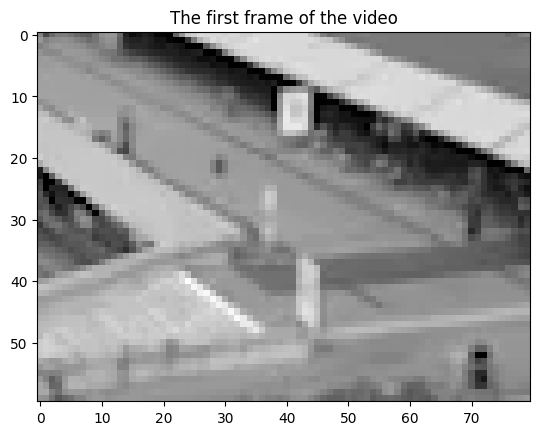

In [6]:
arr = video_to_array(video)
plt.imshow(arr[0, :, :], cmap='gray')
plt.title('The first frame of the video');

### a. –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –±–∞–∑–æ–≤–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ SVD (30 –±–∞–ª–ª–æ–≤)

1. **(10 –±–∞–ª–ª–∞)** –° –ø–æ–º–æ—â—å—é —Ñ—É–Ω–∫—Ü–∏–∏ ```np.reshape(...)``` –ø–æ–ª—É—á–∏—Ç–µ –∏–∑ —Ç—Ä–µ—Ö–º–µ—Ä–Ω–æ–≥–æ –º–∞—Å—Å–∏–≤–∞ ```arr``` –¥–≤—É–º–µ—Ä–Ω—ã–π –º–∞—Å—Å–∏–≤ ```M``` —Ä–∞–∑–º–µ—Ä–∞ ```(size_h * size_w) x nframes```, –∫–∞–∂–¥—ã–º —Å—Ç–æ–ª–±—Ü–æ–º –∫–æ—Ç–æ—Ä–æ–≥–æ —è–≤–ª—è–µ—Ç—Å—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–∞ ```size_h x size_w```, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ–µ –≤ –≤–∏–¥–µ –≤–µ–∫—Ç–æ—Ä–∞ —Å ```size_h * size_w``` —ç–ª–µ–º–µ–Ω—Ç–∞–º–∏.

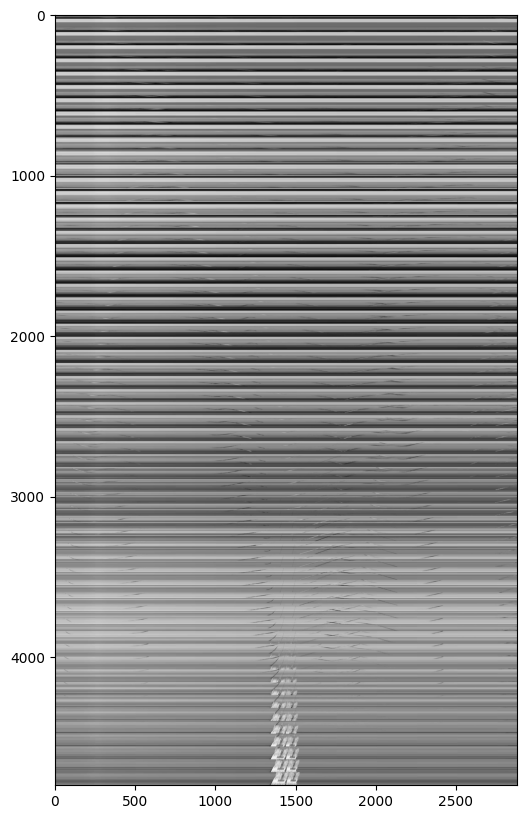

In [7]:
nframes, size_w, size_h = arr.shape
M = np.reshape(arr, (nframes, size_h * size_w)).T

plt.figure(figsize=(10, 10))
plt.imshow(M, cmap='gray');

–ï—Å–ª–∏ –≤—Å—ë —Å–¥–µ–ª–∞–Ω–æ –ø—Ä–∞–≤–∏–ª—å–Ω–æ, —Ç–æ –≤—ã —Å–º–æ–∂–µ—Ç–µ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–∏—Ç—å –ø–µ—Ä–≤—ã–π –∫–∞–¥—Ä –∏–∑ –ø–µ—Ä–≤–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞:

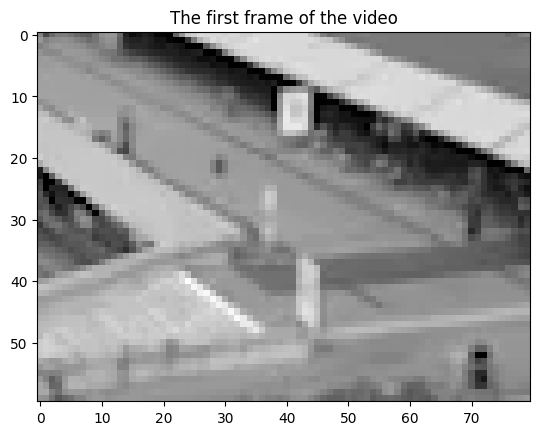

In [8]:
first_frame = M[:,0].reshape(size_w, size_h)
plt.imshow(first_frame, cmap='gray')
plt.title('The first frame of the video');

2. **(6 –±–∞–ª–ª–æ–≤)** –í—ã—á–∏—Å–ª–∏—Ç–µ —Å–∏–Ω–≥—É–ª—è—Ä–Ω–æ–µ —Ä–∞–∑–ª–æ–∂–µ–Ω–∏–µ –º–∞—Ç—Ä–∏—Ü—ã ```M``` —Å –ø–æ–º–æ—â—å—é ```np.linalg.svd(..., full_matrices=False)``` (–ø–∞—Ä–∞–º–µ—Ç—Ä ```full_matrices``` –æ—Ç–≤–µ—á–∞–µ—Ç –∑–∞ —Ä–∞–∑–º–µ—Ä—ã –º–∞—Ç—Ä–∏—Ü—ã $U$ –∏ $V$ –∏–∑ SVD –∏ –ø–æ–∑–≤–æ–ª—è–µ—Ç –∑–∞–º–µ—Ç–Ω–æ —ç–∫–æ–Ω–æ–º–∏—Ç—å –º–µ—Å—Ç–æ –¥–ª—è –ø—Ä—è–º–æ—É–≥–æ–ª—å–Ω—ã—Ö –º–∞—Ç—Ä–∏—Ü). –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫ —Å–∏–Ω–≥—É–ª—è—Ä–Ω—ã—Ö —á–∏—Å–µ–ª, –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ø–æ —É–±—ã–≤–∞–Ω–∏—é –∏ –ø–æ–¥–µ–ª–µ–Ω–Ω—ã—Ö –Ω–∞ —Å—Ç–∞—Ä—à–µ–µ —Å–∏–Ω–≥—É–ª—è—Ä–Ω–æ–µ —á–∏—Å–ª–æ. –®–∫–∞–ª–∞ —Å —Å–∏–Ω–≥—É–ª—è—Ä–Ω—ã–º–∏ —á–∏—Å–ª–∞–º–∏ –¥–æ–ª–∂–Ω–∞ –±—ã—Ç—å –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–π. –î–ª—è —ç—Ç–æ–≥–æ, –Ω–∞–ø—Ä–∏–º–µ—Ä, –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é ```plt.semilogy```. –û–±—ä—è—Å–Ω–∏—Ç–µ, –ø–æ—á–µ–º—É –Ω–∞–∏–±–æ–ª—å—à–µ–µ –∏ –Ω–µ—Å–∫–æ–ª—å–∫–æ –Ω–∞–∏–º–µ–Ω—å—à–∏—Ö (–±–ª–∏–∑–∫–∏—Ö –∫ 0) —Å–∏–Ω–≥—É–ª—è—Ä–Ω—ã—Ö —á–∏—Å–ª–æ –∑–∞–º–µ—Ç–Ω–æ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç –æ—Å—Ç–∞–ª—å–Ω—ã—Ö.

**–ó–∞–º–µ—á–∞–Ω–∏–µ:** –ü—Ä–∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–∏ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –≤–µ–ª–∏—á–∏–Ω —Å –æ—Ç–ª–∏—á–∞—é—â–∏–º–∏—Å—è –Ω–∞ –ø–æ—Ä—è–¥–∫–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –ø–æ–ª–µ–∑–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫—É—é —à–∫–∞–ª—É. –ß—Ç–æ–±—ã —É–±–µ–¥–∏—Ç—å—Å—è –≤ —ç—Ç–æ–º, –ø–æ–ø—Ä–æ–±—É–π—Ç–µ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –≥—Ä–∞—Ñ–∏–∫ –Ω–µ –≤ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–π —à–∫–∞–ª–µ; –∏–∑ –Ω–µ–≥–æ –±—É–¥–µ—Ç —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ–≤–æ–∑–º–æ–∂–Ω–æ –ø–æ–Ω—è—Ç—å —Ö–∞—Ä–∞–∫—Ç–µ—Ä —É–±—ã–≤–∞–Ω–∏—è —Å–∏–Ω–≥—É–ª—è—Ä–Ω—ã—Ö —á–∏—Å–µ–ª. –ù–µ –∑–∞–±—ã–≤–∞–π—Ç–µ –ø–æ–¥–ø–∏—Å—ã–≤–∞—Ç—å –æ—Å–∏!

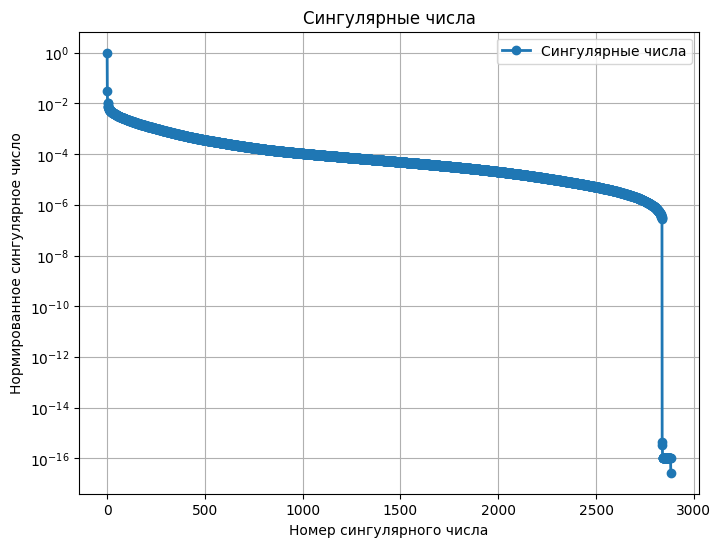

In [51]:
U, S, Vh = np.linalg.svd(M, full_matrices=False)
S_norm = S / S[0]
plt.figure(figsize=(8, 6))
plt.semilogy(S_norm, 'o-', linewidth=2, label='–°–∏–Ω–≥—É–ª—è—Ä–Ω—ã–µ —á–∏—Å–ª–∞')
plt.xlabel('–ù–æ–º–µ—Ä —Å–∏–Ω–≥—É–ª—è—Ä–Ω–æ–≥–æ —á–∏—Å–ª–∞')
plt.ylabel('–ù–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ —Å–∏–Ω–≥—É–ª—è—Ä–Ω–æ–µ —á–∏—Å–ª–æ')
plt.title('–°–∏–Ω–≥—É–ª—è—Ä–Ω—ã–µ —á–∏—Å–ª–∞')
plt.grid(True)
plt.legend()
plt.show()

–†–∞–∑–Ω–∏—Ü–∞ –Ω–∞–∏–±–æ–ª—å—à–∏—Ö, –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ –Ω–∞–∏–º–µ–Ω—å—à–∏—Ö —Å–∏–Ω–≥—É–ª—è—Ä–Ω—ã—Ö —á–∏—Å–ª–µ–ª —Å –æ—Å—Ç–∞–ª—å–Ω—ã–º–∏ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –≤ –º–∞—Ç—Ä–∏—Ü–µ ùëÄ –æ—Å–Ω–æ–≤–Ω–∞—è —á–∞—Å—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ —Å–æ—Å—Ä–µ–¥–æ—Ç–æ—á–µ–Ω–∞ –≤ –ø–µ—Ä–≤—ã—Ö –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞—Ö, –∞ –æ—Å—Ç–∞–≤—à–∏–µ—Å—è –≤–Ω–æ—Å—è—Ç –ª–∏—à—å –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–π –≤–∫–ª–∞–¥ (–∏–ª–∏ –æ—Ç—Ä–∞–∂–∞—é—Ç —à—É–º).

–ü–æ—á–µ–º—É —ç—Ç–æ —Ç–∞–∫? –ù–∞—á–Ω–µ–º —Å —Ç–æ–≥–æ, —á—Ç–æ —Å–∏–Ω–≥—É–ª—è—Ä–Ω–æ–µ —Ä–∞–∑–ª–æ–∂–µ–Ω–∏–µ –∏—â–µ—Ç –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è (—Å–∏–Ω–≥—É–ª—è—Ä–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã) –≤ –¥–∞–Ω–Ω—ã—Ö, –≤–¥–æ–ª—å –∫–æ—Ç–æ—Ä—ã—Ö –¥–∏—Å–ø–µ—Ä—Å–∏—è –º–∞–∫—Å–∏–º–∞–ª—å–Ω–∞, —Ç.–µ. –≥–¥–µ –º—ã –ø–æ–ª—É—á–∞–µ–º –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏. –°–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ, –Ω–∞–∏–±–æ–ª—å—à–µ–µ —Å–∏–Ω–≥—É–ª—è—Ä–Ω–æ–µ —á–∏—Å–ª–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—é, –ø–æ –∫–æ—Ç–æ—Ä–æ–º—É –¥–∞–Ω–Ω—ã–µ –≤–∞—Ä—å–∏—Ä—É—é—Ç—Å—è –Ω–∞–∏–±–æ–ª—å—à–∏–º –æ–±—Ä–∞–∑–æ–º. –î—Ä—É–≥–∏–º–∏ —Å–ª–æ–≤–∞–º–∏, –µ—Å–ª–∏ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å –º–∞—Ç—Ä–∏—Ü—É –∫–∞–∫ –Ω–∞–±–æ—Ä –Ω–∞–±–ª—é–¥–µ–Ω–∏–π, —Ç–æ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –æ–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω–∞—è –∫–æ–º–±–∏–Ω–∞—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (–Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –≤ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ), –≤ –∫–æ—Ç–æ—Ä–æ–π —Ä–∞–∑–±—Ä–æ—Å –¥–∞–Ω–Ω—ã—Ö –º–∞–∫—Å–∏–º–∞–ª–µ–Ω - —ç—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ —Å–æ—Å—Ä–µ–¥–æ—Ç–æ—á–µ–Ω–æ –≤ —ç—Ç–æ–º –≥–ª–∞–≤–Ω–æ–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–∏ (–≤ –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ —ç—Ç–æ —Ç–∞–∫, –ø–æ—Ç–æ–º—É —á—Ç–æ –ø–∏–∫—Å–µ–ª–∏ —Å–∏–ª—å–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç –º–µ–∂–¥—É —Å–æ–±–æ–π). –ú–∞–ª–µ–Ω—å–∫–∏–µ –∂–µ —Å–∏–Ω–≥—É–ª—è—Ä–Ω—ã–µ —á–∏—Å–ª–∞ (–±–ª–∏–∑–∫–∏–µ –∫ 0) –æ—Ç—Ä–∞–∂–∞—é—Ç –æ—á–µ–Ω—å –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–µ –≤–∞—Ä–∏–∞—Ü–∏–∏ -  –≤–¥–æ–ª—å —ç—Ç–∏—Ö –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–π –¥–∞–Ω–Ω—ã—Ö –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ—Ç ‚Äî –æ–Ω–∏ –ª–∏–±–æ –∏–∑–±—ã—Ç–æ—á–Ω—ã, –ª–∏–±–æ —Å–æ–¥–µ—Ä–∂–∞—Ç —à—É–º, –∫–æ—Ç–æ—Ä—ã–π –Ω–µ –≤–Ω–æ—Å–∏—Ç —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ –≤–∫–ª–∞–¥–∞ –≤ –æ–±—â—É—é –¥–∏—Å–ø–µ—Ä—Å–∏—é –¥–∞–Ω–Ω—ã—Ö.


3. **(10 –±–∞–ª–ª–æ–≤)** –ù–∞–ø–∏—à–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é ```trunc_svd(M, r)```, –∫–æ—Ç–æ—Ä–∞—è —Å—á–∏—Ç–∞–µ—Ç –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏–µ $M_{r}$ –¥–≤—É–º–µ—Ä–Ω–æ–≥–æ –º–∞—Å—Å–∏–≤–∞ $M$ –∑–∞–¥–∞–Ω–Ω–æ–≥–æ —Ä–∞–Ω–≥–∞, –∞ —Ç–∞–∫–∂–µ **–æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—É—é** —Ç–æ—á–Ω–æ—Å—Ç—å —ç—Ç–æ–≥–æ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è –≤ —Ñ—Ä–æ–±–µ–Ω–∏—É—Å–æ–≤–æ–π –Ω–æ—Ä–º–µ, —Ç.–µ. $$
\frac{\|M - M_{r}\|_F}{\|M\|_F}.
$$
–î–ª—è —Ä–∞—Å—á–µ—Ç–∞ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ–π —Ç–æ—á–Ω–æ—Å—Ç–∏ –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ **—Ç–æ–ª—å–∫–æ** —Å–∏–Ω–≥—É–ª—è—Ä–Ω—ã–µ —á–∏—Å–ª–∞ –º–∞—Ç—Ä–∏—Ü—ã $M$.

In [10]:
def trunc_svd(M, r):
    U, S, Vt = np.linalg.svd(M, full_matrices=False)
    M_r = (U[:, :r] * S[:r]) @ Vt[:r, :]
    rel_eps = np.sqrt(np.sum(S[r:]**2)) / np.sqrt(np.sum(S**2))
    return M_r, rel_eps

4. **(4 –±–∞–ª–ª–∞)** –ò—Å–ø–æ–ª—å–∑—É—è –Ω–∞–ø–∏—Å–∞–Ω–Ω—É—é —Ñ—É–Ω–∫—Ü–∏—é, –Ω–∞–π–¥–∏—Ç–µ –Ω–∞–∏–ª—É—á—à–µ–µ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏–µ –º–∞—Ç—Ä–∏—Ü—ã ```M``` –º–∞—Ç—Ä–∏—Ü–µ–π ```M_svd``` —Ä–∞–Ω–≥–∞ 1. –° –ø–æ–º–æ—â—å—é ```plt.imshow(..., cmap='gray')``` –ø–æ—Å—Ç—Ä–æ–π—Ç–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –ø–µ—Ä–≤–æ–≥–æ –∫–∞–¥—Ä–∞
    - –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –≤–∏–¥–µ–æ
    - —Ñ–æ–Ω–∞ (–ø–æ–ª—É—á–µ–Ω–Ω–æ–≥–æ –∏–∑ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è —Ä–∞–Ω–≥–∞ 1)
    - –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –ª—é–¥–µ–π (–ø–æ–ª—É—á–µ–Ω–Ω–æ–≥–æ —Å –ø–æ–º–æ—â—å—é –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∏–∑ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –¥–≤—É—Ö –ø–æ–¥–ø—É–Ω–∫—Ç–æ–≤)

In [11]:
M_svd, rel_eps = trunc_svd(M, 1)
first_frame = M[:, 0].reshape(size_w, size_h)
background_frame = M_svd[:, 0].reshape(size_w, size_h)
people_frame = first_frame - background_frame

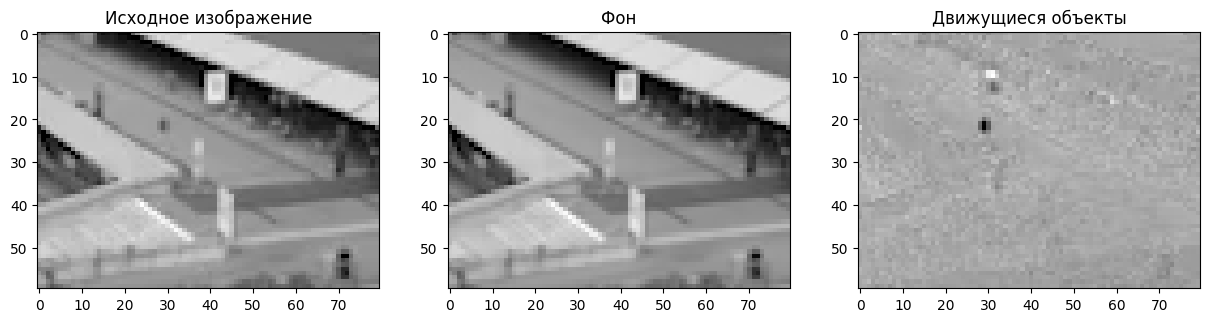

In [12]:
_, axs = plt.subplots(1,3, figsize=(15,10))
axs[0].imshow(first_frame, cmap='gray')
axs[0].set_title("–ò—Å—Ö–æ–¥–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ")
axs[1].imshow(background_frame, cmap='gray')
axs[1].set_title("–§–æ–Ω")
axs[2].imshow(people_frame, cmap='gray')
axs[2].set_title("–î–≤–∏–∂—É—â–∏–µ—Å—è –æ–±—ä–µ–∫—Ç—ã");

### b. –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ —Ä–∞–Ω–¥–æ–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ SVD (28 –±–∞–ª–ª–æ–≤)

–ó–∞–≥—Ä—É–∑–∏–º —Ç–µ–ø–µ—Ä—å –≤–∏–¥–µ–æ –≤ –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–æ–º —Ä–∞–∑—Ä–µ—à–µ–Ω–∏–∏.

In [13]:
import moviepy.editor as mpe
video3 = mpe.VideoFileClip("data/SVD_video_3.mp4", target_resolution=(100, 178))
video3.ipython_display(width=300, maxduration=250)
arr = video_to_array(video3)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4
image size: 178 x 100, 
number of frames: 3600


In [14]:
arr3 = video_to_array(video3)
nframes, size_w, size_h = arr3.shape
M3 = np.reshape(arr, (nframes, size_h * size_w)).T

image size: 178 x 100, 
number of frames: 3600


–ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ ```np.linalg.svd``` —è–≤–ª—è–µ—Ç—Å—è —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã–º –¥–ª—è –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –Ω–µ–±–æ–ª—å—à–∏—Ö –º–∞—Å—Å–∏–≤–æ–≤ –∏–∑-–∑–∞ –±—ã—Å—Ç—Ä–æ–≥–æ —Ä–æ—Å—Ç–∞ —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Ä–∞–∑–º–µ—Ä–∞ –º–∞—Ç—Ä–∏—Ü—ã. –ò—Å–ø–æ–ª—å–∑—É–µ–º —Ä–∞–Ω–¥–æ–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º –∏–∑ –ª–µ–∫—Ü–∏–π –¥–ª—è —É—Å–∫–æ—Ä–µ–Ω–∏—è –≤—ã—á–∏—Å–ª–µ–Ω–∏–π (–µ—Å—Ç—å —Ç–∞–∫–∂–µ [–ø–æ—Å—Ç](https://gregorygundersen.com/blog/2019/01/17/randomized-svd/) —Å –æ–ø–∏—Å–∞–Ω–∏–µ–º –∞–ª–≥–æ—Ä–∏—Ç–º–∞).

1. **(16 –±–∞–ª–ª–æ–≤)** –†–µ–∞–ª–∏–∑—É–π—Ç–µ —Ä–∞–Ω–¥–æ–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º SVD –∏–∑ –ª–µ–∫—Ü–∏–π, –∫–æ—Ç–æ—Ä—ã–π –∞–ø–ø—Ä–æ–∫—Å–∏–º–∏—Ä—É–µ—Ç –º–∞—Ç—Ä–∏—Ü—É —Å –∑–∞–¥–∞–Ω–Ω—ã–º —Ä–∞–Ω–≥–æ–º $r$ (–∞–ª–≥–æ—Ä–∏—Ç–º –∑–∞–ø—É—Å–∫–∞–µ—Ç—Å—è —Å ```r + oversampling``` —Å–ª—É—á–∞–π–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤, –ø–æ—Å–ª–µ —á–µ–≥–æ —Ä–∞–Ω–≥ –æ–±—Ä–µ–∑–∞–µ—Ç—Å—è –¥–æ ```r``` —Å –Ω–∞–∏–º–µ–Ω—å—à–µ–π –æ—à–∏–±–∫–æ–π). –£–±–µ–¥–∏—Ç–µ—Å—å, —á—Ç–æ –≤—ã –Ω–µ –≤—ã—á–∏—Å–ª—è–µ—Ç–µ –≤ —è–≤–Ω–æ–º –≤–∏–¥–µ –º–∞—Ç—Ä–∏—Ü—É $QQ^\top$. –ï—Å–ª–∏ –Ω–∞ –∑–∞–¥–∞–Ω–Ω–æ–π –º–∞—Ç—Ä–∏—Ü–µ –∞–ª–≥–æ—Ä–∏—Ç–º —Ä–∞–±–æ—Ç–∞–µ—Ç —Å–ª–∏—à–∫–æ–º –¥–æ–ª–≥–æ (–º–∏–Ω—É—Ç—ã), —Ç–æ –≤–æ–∑–º–æ–∂–Ω–æ, –≤—ã —á—Ç–æ-—Ç–æ –¥–µ–ª–∞–µ—Ç–µ –Ω–µ —Ç–∞–∫.

In [49]:
def rand_svd(M, r, oversampling=10):
    n = M.shape[1]
    Omega = np.random.randn(n, r + oversampling)
    Y = M @ Omega
    Q, R = np.linalg.qr(Y)
    U, S, Vt = np.linalg.svd(Q.T @ M, full_matrices=False)
    U_approx = Q @ U
    M_r = U_approx[:, :r] @ np.diag(S[:r]) @ Vt[:r, :]
    rel_eps = np.linalg.norm(M_r - M, 'fro') / np.linalg.norm(M, 'fro')
    return M_r, rel_eps

2. **(2 –±–∞–ª–ª)** –ò—Å–ø–æ–ª—å–∑—É—è ```rand_svd```, –Ω–∞–π–¥–∏—Ç–µ –Ω–∞–∏–ª—É—á—à–µ–µ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏–µ –º–∞—Ç—Ä–∏—Ü—ã ```M``` –º–∞—Ç—Ä–∏—Ü–µ–π ```M_rand``` —Ä–∞–Ω–≥–∞ 1. –° –ø–æ–º–æ—â—å—é ```plt.imshow(..., cmap='gray')``` –ø–æ—Å—Ç—Ä–æ–π—Ç–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –ø–µ—Ä–≤–æ–≥–æ –∫–∞–¥—Ä–∞
    - –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –≤–∏–¥–µ–æ
    - —Ñ–æ–Ω–∞ (–ø–æ–ª—É—á–µ–Ω–Ω–æ–≥–æ –∏–∑ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è —Ä–∞–Ω–≥–∞ 1)
    - –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –ª—é–¥–µ–π (–ø–æ–ª—É—á–µ–Ω–Ω–æ–≥–æ —Å –ø–æ–º–æ—â—å—é –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∏–∑ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –¥–≤—É—Ö –ø–æ–¥–ø—É–Ω–∫—Ç–æ–≤)

In [16]:
M3_r, rel_eps = rand_svd(M3, 1)
first_frame = M3[:, 0].reshape(size_w, size_h)
background_frame = M3_r[:, 0].reshape(size_w, size_h)
people_frame = first_frame - background_frame

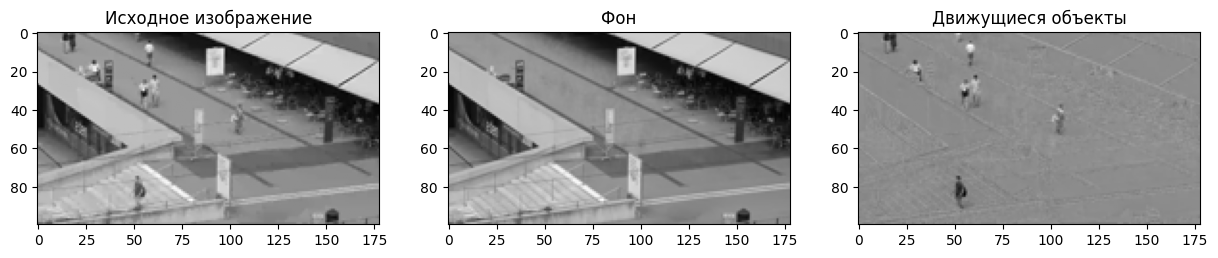

In [17]:
_, axs = plt.subplots(1,3, figsize=(15,10))
axs[0].imshow(first_frame, cmap='gray')
axs[0].set_title("–ò—Å—Ö–æ–¥–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ")
axs[1].imshow(background_frame, cmap='gray')
axs[1].set_title("–§–æ–Ω")
axs[2].imshow(people_frame, cmap='gray')
axs[2].set_title("–î–≤–∏–∂—É—â–∏–µ—Å—è –æ–±—ä–µ–∫—Ç—ã");

3. **(10 –±–∞–ª–ª–æ–≤)** –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫ —Ñ—É–Ω–∫—Ü–∏–∏
$$
\frac{||M_{rand}(p) - M||_F}{||M||_F}
$$
–ø—Ä–∏ $r=2$ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç $p$ (```oversampling=p``` –≤ —Ñ—É–Ω–∫—Ü–∏–∏ ```rand_svd```). –ü–æ $p$ –≤—ã–±–µ—Ä–∏—Ç–µ —Å–µ—Ç–∫—É $[0, 30]$ —Å —à–∞–≥–æ–º 2.
–¢–∞–∫ –∫–∞–∫ $M_{rand}(p)$ –ø–æ–ª—É—á–µ–Ω–æ —Å –ø–æ–º–æ—â—å—é —Ä–∞–Ω–¥–æ–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞, —É—Å—Ä–µ–¥–Ω–∏—Ç–µ –í–∞—à —Ä–µ–∑—É–ª—å—Ç–∞—Ç, –∑–∞–ø—É—Å—Ç–∏–≤ –∞–ª–≥–æ—Ä–∏—Ç–º 10 —Ä–∞–∑.
–ü—Ä–∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–∏ –≥—Ä–∞—Ñ–∏–∫–∞ –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫—É—é —à–∫–∞–ª—É –ø–æ –æ—Å–∏ —Å –æ—à–∏–±–∫–æ–π.
**–í –¥–∞–Ω–Ω–æ–º –∑–∞–¥–∞–Ω–∏–∏ —Ä–∞–∑—Ä–µ—à–∞–µ—Ç—Å—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ü–∏–∫–ª—ã –¥–ª—è –ø–µ—Ä–µ–±–æ—Ä–∞ –ø–æ —Å–µ—Ç–∫–µ –∏ –∑–∞–ø—É—Å–∫–∞ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ 10 —Ä–∞–∑.**

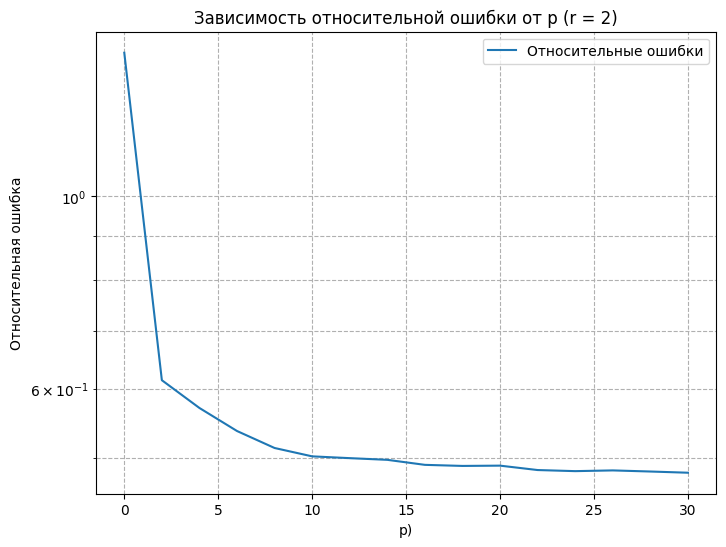

In [19]:
errors = []

for p in np.arange(0, 32, 2):
    error_sum = 0
    for _ in range(10):
        M_r, error = rand_svd(M, r=2, oversampling=p)
        error_sum += error
    errors.append(np.mean(error_sum))

plt.figure(figsize=(8, 6))
plt.plot(np.arange(0, 32, 2), errors, '-', label='–û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—ã–µ –æ—à–∏–±–∫–∏')
plt.yscale('log')
plt.xlabel('p)')
plt.ylabel('–û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞')
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ–π –æ—à–∏–±–∫–∏ –æ—Ç p (r = 2)')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

**–ó–∞–º–µ—á–∞–Ω–∏–µ:** ```np.linalg.svd``` –Ω–∞ —ç—Ç–∏—Ö —Ä–∞–∑–º–µ—Ä–∞—Ö –º–∞—Ç—Ä–∏—Ü –∏ –∑–Ω–∞—á–µ–Ω—è—Ö —Ä–∞–Ω–≥–æ–≤ –±—É–¥–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å –∑–∞–º–µ—Ç–Ω–æ –º–µ–¥–ª–µ–Ω–Ω–µ–µ (–ø—Ä–∞–≤–¥–∞, —Å –ø–æ–ª–Ω–æ—Å—Ç—å—é –∫–æ–Ω—Ç—Ä–æ–ª–∏—Ä—É–µ–º–æ–π —Ç–æ—á–Ω–æ—Å—Ç—å—é), —á–µ–º —Ä–∞–Ω–¥–æ–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º. –¢–∞–∫–∂–µ –æ–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ, —á—Ç–æ –µ—Å–ª–∏ –Ω–µ —É–∫–∞–∑–∞—Ç—å –æ–ø—Ü–∏—é ```full_matrices=False``` –≤ ```np.linalg.svd```, —Ç–æ –Ω–∞ –¥–∞–Ω–Ω–æ–º –ø—Ä–∏–º–µ—Ä–µ –º–æ–∂–µ—Ç —Å–ª—É—á–∏—Ç—å—Å—è –ø–µ—Ä–µ–ø–æ–ª–Ω–µ–Ω–∏–µ –ø–æ –ø–∞–º—è—Ç–∏.

### c. –í–∏–¥–µ–æ —Å –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º –æ—Å–≤–µ—â–µ–Ω–∏–µ–º (12 –±–∞–ª–ª–æ–≤)

–ó–∞–≥—Ä—É–∑–∏–º —Ç–µ–ø–µ—Ä—å –±–æ–ª–µ–µ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ–µ –≤–∏–¥–µ–æ, –≤ –∫–æ—Ç–æ—Ä–æ–º —Å–æ –≤—Ä–µ–º–µ–Ω–µ–º –º–µ–Ω—è–µ—Ç—Å—è –æ—Å–≤–µ—â–µ–Ω–∏–µ (–º–æ–∂–Ω–æ, –∫ –ø—Ä–∏–º–µ—Ä—É, –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç—å, —á—Ç–æ –≤—Å—Ç–∞—ë—Ç —Å–æ–ª–Ω—Ü–µ).

In [20]:
video2 = mpe.VideoFileClip("data/SVD_video_2.mp4")
video2.ipython_display(width=300, maxduration=250)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [21]:
arr2 = video_to_array(video2)

image size: 80 x 60, 
number of frames: 2883


–ü–æ–∫–∞ —á—Ç–æ –≤–æ–∑—å–º—ë–º –ª–∏—à—å –ø–µ—Ä–≤—ã–µ 80% –≤–∏–¥–µ–æ, –æ—Å—Ç–∞–ª—å–Ω–æ–π —á–∞—Å—Ç—å—é –≤–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è –ø–æ–∑–∂–µ.

In [22]:
breakpoint = round(0.8*arr2.shape[0])
remaining = arr2[breakpoint:]
arr2 = arr2[:breakpoint]

1. –ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ –ø—É–Ω–∫—Ç—É a.1) –ø–æ–ª—É—á–∏—Ç–µ –∏–∑ —Ç—Ä–µ—Ö–º–µ—Ä–Ω–æ–≥–æ –º–∞—Å—Å–∏–≤–∞ ```arr2``` –¥–≤—É–º–µ—Ä–Ω—ã–π –º–∞—Å—Å–∏–≤ ```M2``` —Ä–∞–∑–º–µ—Ä–∞ ```(size_h * size_w) x nframes2```.

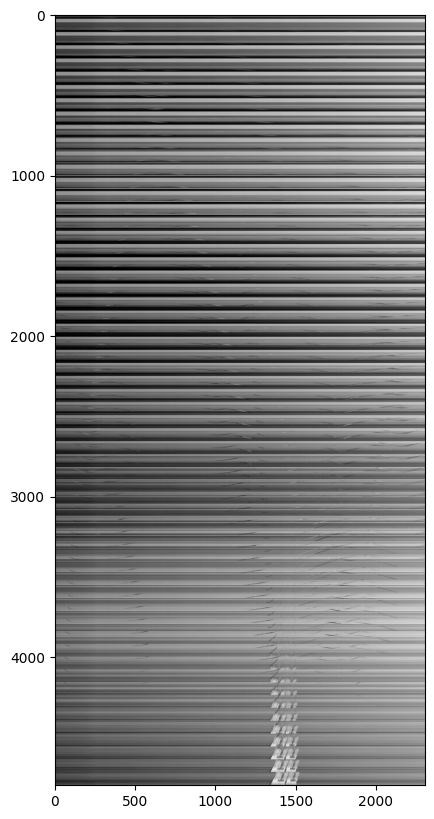

In [23]:
nframes2, size_w, size_h = arr2.shape
M2 = np.reshape(arr2, (nframes2, size_h * size_w)).T

plt.figure(figsize=(10, 10))
plt.imshow(M2, cmap='gray');

2. **(3 –±–∞–ª–ª–∞)** –ü—Ä–∏–º–µ–Ω–∏—Ç–µ –º–µ—Ç–æ–¥—ã –∏–∑ –ø—É–Ω–∫—Ç–æ–≤ a) –∏ b) (—Ç–æ –µ—Å—Ç—å –±–∏–±–ª–∏–æ—Ç–µ—á–Ω–æ–µ –ø–æ–ª–Ω–æ–µ SVD –∏ —Ä–∞–Ω–¥–æ–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ SVD) –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –Ω–∞–∏–ª—É—á—à–µ–≥–æ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è —Ä–∞–Ω–≥–∞ 2 (—á—Ç–æ–±—ã —Ç–∞–∫–∂–µ —É—á–µ—Å—Ç—å –∏–∑–º–µ–Ω–µ–Ω–∏–µ –æ—Å–≤–µ—â–µ–Ω–∏—è) –¥–ª—è –º–∞—Ç—Ä–∏—Ü—ã `M2`. –°—Ä–∞–≤–Ω–∏—Ç–µ –≤—Ä–µ–º—è —Ä–∞–±–æ—Ç—ã –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤.

In [24]:
%timeit trunc_svd(M2, 2)

15.4 s ¬± 334 ms per loop (mean ¬± std. dev. of 7 runs, 1 loop each)


In [25]:
%timeit rand_svd(M2, 2)

310 ms ¬± 20.8 ms per loop (mean ¬± std. dev. of 7 runs, 1 loop each)


In [26]:
M2_svd, rel_eps1 = trunc_svd(M2, 2)
M2_rand, rel_eps2 = rand_svd(M2, 2)

3. **(4 –±–∞–ª–ª–∞)** C—Ä–∞–≤–Ω–∏—Ç–µ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—ã–µ —Ç–æ—á–Ω–æ—Å—Ç–∏ —Ç–∞–∫–∏—Ö –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏–π –¥–ª—è –Ω–∞—Å—Ç–æ—è—â–µ–≥–æ SVD –∏ —Ä–∞–Ω–¥–æ–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞; —Ç–∞–∫–∂–µ —Å—Ä–∞–≤–Ω–∏—Ç–µ –∏—Ö —Å —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–µ–π –≤–µ–ª–∏—á–∏–Ω–æ–π –¥–ª—è –≤–∏–¥–µ–æ —Å –ø–æ—Å—Ç–æ—è–Ω–Ω—ã–º –æ—Å–≤–µ—â–µ–Ω–∏–µ–º. –ö–∞–∫–∏–µ –≤—ã–≤–æ–¥—ã –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å?

In [27]:
M_svd, rel_eps_M = trunc_svd(M3, 2)
M3_svd, rel_eps_M3 = rand_svd(M3, 2)

In [28]:
print(f'–û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ (—Ç–æ—á–Ω–æ—Å—Ç—å) –¥–ª—è –≤–∏–¥–µ–æ —Å –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º –æ—Å–≤–µ—â–µ–Ω–∏–µ–º –¥–ª—è –Ω–∞—Å—Ç–æ—è—â–µ–≥–æ SVD (—Ä–∞–Ω–≥ - 2) - {rel_eps1}')
print(f'–û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ (—Ç–æ—á–Ω–æ—Å—Ç—å) –¥–ª—è –≤–∏–¥–µ–æ —Å –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º –æ—Å–≤–µ—â–µ–Ω–∏–µ–º –¥–ª—è —Ä–∞–Ω–¥–æ–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ (—Ä–∞–Ω–≥ - 2) - {rel_eps2}')
print(f'–û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ (—Ç–æ—á–Ω–æ—Å—Ç—å) –¥–ª—è –≤–∏–¥–µ–æ —Å –ø–æ—Å—Ç–æ—è–Ω–Ω—ã–º –æ—Å–≤–µ—â–µ–Ω–∏–µ–º –¥–ª—è –Ω–∞—Å—Ç–æ—è—â–µ–≥–æ SVD (—Ä–∞–Ω–≥ - 2) - {rel_eps_M}')
print(f'–û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ (—Ç–æ—á–Ω–æ—Å—Ç—å) –¥–ª—è –≤–∏–¥–µ–æ —Å –ø–æ—Å—Ç–æ—è–Ω–Ω—ã–º –æ—Å–≤–µ—â–µ–Ω–∏–µ–º –¥–ª—è —Ä–∞–Ω–¥–æ–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ (—Ä–∞–Ω–≥ - 2) - {rel_eps_M3}')

–û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ (—Ç–æ—á–Ω–æ—Å—Ç—å) –¥–ª—è –≤–∏–¥–µ–æ —Å –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º –æ—Å–≤–µ—â–µ–Ω–∏–µ–º –¥–ª—è –Ω–∞—Å—Ç–æ—è—â–µ–≥–æ SVD (—Ä–∞–Ω–≥ - 2) - 0.06063233098450479
–û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ (—Ç–æ—á–Ω–æ—Å—Ç—å) –¥–ª—è –≤–∏–¥–µ–æ —Å –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º –æ—Å–≤–µ—â–µ–Ω–∏–µ–º –¥–ª—è —Ä–∞–Ω–¥–æ–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ (—Ä–∞–Ω–≥ - 2) - 0.06634107856343033
–û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ (—Ç–æ—á–Ω–æ—Å—Ç—å) –¥–ª—è –≤–∏–¥–µ–æ —Å –ø–æ—Å—Ç–æ—è–Ω–Ω—ã–º –æ—Å–≤–µ—â–µ–Ω–∏–µ–º –¥–ª—è –Ω–∞—Å—Ç–æ—è—â–µ–≥–æ SVD (—Ä–∞–Ω–≥ - 2) - 0.04555364920579858
–û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ (—Ç–æ—á–Ω–æ—Å—Ç—å) –¥–ª—è –≤–∏–¥–µ–æ —Å –ø–æ—Å—Ç–æ—è–Ω–Ω—ã–º –æ—Å–≤–µ—â–µ–Ω–∏–µ–º –¥–ª—è —Ä–∞–Ω–¥–æ–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ (—Ä–∞–Ω–≥ - 2) - 0.04828030764652998


–ö–∞–∫ –º—ã –≤–∏–¥–∏–º, —Ä–∞–Ω–¥–æ–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º —Ä–∞–±–æ—Ç–∞–µ—Ç –≤–æ –º–Ω–æ–≥–æ —Ä–∞–∑ –±—ã—Å—Ç—Ä–µ–µ (–∏–∑-–∑–∞ –º–µ–Ω—å—à–µ–≥–æ –æ–±—ä–µ–º–∞ –≤—ã—á–∏—Å–ª–µ–Ω–∏–π), –Ω–æ –∏–º–µ–µ—Ç —á—É—Ç—å –±–æ–ª—å—à—É—é –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—É—é –æ—à–∏–±–∫—É.

–†–∞–∑–±–µ—Ä–µ–º—Å—è, –ø–æ—á–µ–º—É —ç—Ç–æ —Ç–∞–∫.

–ò–∑–º–µ–Ω–µ–Ω–∏—è –æ—Å–≤–µ—â–µ–Ω–∏—è –¥–æ–±–∞–≤–ª—è—é—Ç –≤–∞—Ä–∏–∞—Ç–∏–≤–Ω–æ—Å—Ç—å –≤ –¥–∞–Ω–Ω—ã–µ, –∫–æ—Ç–æ—Ä–∞—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –ø–æ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–º —Å–∏–Ω–≥—É–ª—è—Ä–Ω—ã–º –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞–º. –ü—Ä–∏ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏–∏ –º–∞—Ç—Ä–∏—Ü—ã —Ä–∞–Ω–≥–æ–º 2 —á–∞—Å—Ç—å —ç—Ç–æ–π –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –Ω–µ —É—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è, –∫—Ä–æ–º–µ —Ç–æ–≥–æ, —Ä–∞–Ω–¥–æ–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –º–µ—Ç–æ–¥, –∫–æ—Ç–æ—Ä—ã–π –ø—Ä–∏–±–ª–∏–∂–∞–µ—Ç –º–∞—Ç—Ä–∏—Ü—É —á–µ—Ä–µ–∑ —Å–ª—É—á–∞–π–Ω–æ–µ –ø—Ä–æ–µ—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ, –º–æ–∂–µ—Ç —á—É—Ç—å –º–µ–Ω–µ–µ —Ç–æ—á–Ω–æ —É–ª–æ–≤–∏—Ç—å —ç—Ç–∏ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –≤–∞—Ä–∏–∞—Ü–∏–∏, - –æ–±–∞ —ç—Ç–∏—Ö —Ñ–∞–∫—Ç–æ—Ä–∞ –ø—Ä–∏–≤–æ–¥—è—Ç –∫ –Ω–µ–º–Ω–æ–≥–æ –±–æ–ª—å—à–µ–π –æ—à–∏–±–∫–µ.

–í –≤–∏–¥–µ–æ —Å –ø–æ—Å—Ç–æ—è–Ω–Ω—ã–º –æ—Å–≤–µ—â–µ–Ω–∏–µ–º –¥–∞–Ω–Ω—ã–µ –±–æ–ª–µ–µ –æ–¥–Ω–æ—Ä–æ–¥–Ω—ã, –∏ –±–æ–ª—å—à–∞—è —á–∞—Å—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ —Å–æ—Å—Ä–µ–¥–æ—Ç–æ—á–µ–Ω–∞ –≤ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –≥–ª–∞–≤–Ω—ã—Ö –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞—Ö, —Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ, –ø—Ä–∏ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏–∏ —Ä–∞–Ω–≥–∞ 2 –ø–æ—á—Ç–∏ –≤—Å–µ —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ —Å–æ—Ö—Ä–∞–Ω—è—é—Ç—Å—è, –ø–æ—ç—Ç–æ–º—É –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∏–∂–µ, —á–µ–º –ø—Ä–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–º. (–Ω–µ–±–æ–ª—å—à–∞—è –ø–æ—Ç–µ—Ä—è —Ç–æ—á–Ω–æ—Å—Ç–∏ –≤ —Ä–∞–Ω–¥–æ–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–º SVD, —Å–≤—è–∑–∞–Ω–Ω–∞—è —Å –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏–µ–º –ø–æ–¥–ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞, –∫–æ—Ç–æ—Ä–æ–µ –ø—Ä–∏ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ–º oversampling'e –æ–∫–∞–∑—ã–≤–∞–µ—Ç—Å—è –±–ª–∏–∑–∫–æ–π –∫ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–º—É —Ä–µ—à–µ–Ω–∏—é, –Ω–æ –≤—Å—ë –∂–µ –º–æ–∂–µ—Ç –¥–∞–≤–∞—Ç—å –Ω–µ–º–Ω–æ–≥–æ –±–æ–ª—å—à—É—é –æ—à–∏–±–∫—É –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –ø–æ–ª–Ω—ã–º SVD)

4. **(5 –±–∞–ª–ª–∞)** –ó–∞–ø–æ–ª–Ω–∏—Ç–µ –ø—Ä–æ–ø—É—Å–∫–∏ –≤ —Ñ—É–Ω–∫—Ü–∏–∏ `M_to_video`, –ø—Ä–µ–æ–±—Ä–∞–∑—É—é—â–µ–π –º–∞—Ç—Ä–∏—Ü—É —Ç–∏–ø–∞ ```M2``` –æ–±—Ä–∞—Ç–Ω–æ –≤ –≤–∏–¥–µ–æ.

In [29]:
def M_to_video(M, fps, size_w, size_h):
    nframes = M.shape[1]
    arr = M.T.reshape(nframes, size_w, size_h)
    def make_frame(t):
        index = int(t * fps)
        frame = arr[index, :, :]
        frame = np.clip(frame, 0, 255)
        frame_rgb = frame[:, :, np.newaxis][:, :, [0,0,0]]
        return frame_rgb
    return mpe.VideoClip(make_frame, duration=nframes / fps)

–ü–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫ –≤—ã–≥–ª—è–¥–∏—Ç –ø—Ä–µ–¥–ª–∞–≥–∞–µ–º–æ–µ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏–µ.

In [30]:
video2_svd = M_to_video(M2_svd - M2, 20, size_w, size_h)
video2_svd.ipython_display(width=300, maxduration=250, fps=20)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


–î–ª—è –±–æ–ª—å—à–µ–π –Ω–∞–≥–ª—è–¥–Ω–æ—Å—Ç–∏ –º–æ–∂–µ—Ç–µ —Ç–∞–∫–∂–µ –∑–∞–ø—É—Å—Ç–∏—Ç—å –≤–∏–¥–µ–æ –∏–∑ –ø—É–Ω–∫—Ç–∞ b) —Å –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–º —Ä–∞–∑—Ä–µ—à–µ–Ω–∏–µ–º.

### d. –û–±—Ä–∞–±–æ—Ç–∫–∞ –Ω–æ–≤—ã—Ö –∫–∞–¥—Ä–æ–≤ (25 –±–∞–ª–ª–æ–≤)

–ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ –Ω–∞ –∫–∞–º–µ—Ä—É –ø–æ—Å—Ç—É–ø–∏–ª –Ω–æ–≤—ã–π –ø–æ—Ç–æ–∫ –∫–∞–¥—Ä–æ–≤. –ú—ã –º–æ–≥–ª–∏ –±—ã —É–≤–µ–ª–∏—á–∏—Ç—å –Ω–∞—à—É –º–∞—Ç—Ä–∏—Ü—É M2 –∏ –ø–µ—Ä–µ—Å—á–∏—Ç–∞—Ç—å SVD, –Ω–æ —ç—Ç–æ —Å–ª–∏—à–∫–æ–º –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω–æ —Å–ª–æ–∂–Ω–æ —Ä–∞–¥–∏ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –Ω–æ–≤—ã—Ö –∫–∞–¥—Ä–æ–≤. –ë–æ–ª–µ–µ —Ç–æ–≥–æ, –ª–æ–≥–∏—á–Ω–æ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç—å, —á—Ç–æ –µ—Å–ª–∏ —É –Ω–∞—Å —É–∂–µ –±—ã–ª–æ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –º–Ω–æ–≥–æ –∫–∞–¥—Ä–æ–≤ –≤ –º–∞—Ç—Ä–∏—Ü–µ M2, —Ç–æ —Å–∏–Ω–≥—É–ª—è—Ä–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã –Ω–µ –∏–∑–º–µ–Ω—è—Ç—Å—è —Å–∏–ª—å–Ω–æ –æ—Ç –¥–æ–±–∞–≤–ª–µ–Ω–∏—è –Ω–æ–≤—ã—Ö –∫–∞–¥—Ä–æ–≤.

–ü—Ä–∏ —ç—Ç–æ–º –ø—Ä–æ—Å—Ç–æ –≤—ã—á–µ—Å—Ç—å —Ñ–æ–Ω –Ω–µ –ø–æ–ª—É—á–∏—Ç—Å—è, –≤–µ–¥—å –º—ã —Ö–æ—Ç–∏–º —Ç–∞–∫–∂–µ —É—á–∏—Ç—ã–≤–∞—Ç—å –∏–∑–º–µ–Ω–µ–Ω–∏–µ –æ—Å–≤–µ—â–µ–Ω–∏—è. –î–ª—è —ç—Ç–æ–≥–æ –ø–æ—Å—á–∏—Ç–∞–µ–º –æ—Ä—Ç–æ–≥–æ–Ω–∞–ª—å–Ω—É—é –ø—Ä–æ–µ–∫—Ü–∏—é –Ω–æ–≤–æ–≥–æ –∫–∞–¥—Ä–∞ –Ω–∞ –æ–±—Ä–∞–∑ –º–∞—Ç—Ä–∏—Ü—ã M2.




1. **(15 –±–∞–ª–ª–æ–≤)** –ò—Å–ø–æ–ª—å–∑—É—è SVD —Ä–∞–∑–ª–æ–∂–µ–Ω–∏–µ –æ—Ä—Ç–æ–≥–æ–Ω–∞–ª—å–Ω–æ —Å–ø—Ä–æ–µ—Ü–∏—Ä—É–π—Ç–µ –Ω–æ–≤—ã–π –∫–∞–¥—Ä –Ω–∞ –æ–±—Ä–∞–∑ –º–∞—Ç—Ä–∏—Ü—ã M2.

–í–∞—à –∫–æ–¥ –¥–æ–ª–∂–µ–Ω —Ä–∞–±–æ—Ç–∞—Ç—å –∫–∞–∫ –¥–ª—è 1 –∫–∞–¥—Ä–∞ (–≤–µ–∫—Ç–æ—Ä–∞ –¥–ª–∏–Ω—ã size_h * size_w), —Ç–∞–∫ –∏ –¥–ª—è –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö (–º–∞—Ç—Ä–∏—Ü—ã —Ä–∞–∑–º–µ—Ä–∞ (size_h * size_w) x k). –°–ª–æ–∂–Ω–æ—Å—Ç—å –∏—Ç–æ–≥–æ–≤–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –¥–ª—è –æ–±—Ä–∞–±–æ—Ç–∫–∏ 1 –∫–∞–¥—Ä–∞ –¥–æ–ª–∂–Ω–∞ –±—ã—Ç—å O(size_h * size_w). SVD –º–∞—Ç—Ä–∏—Ü—ã M2 —Å—á–∏—Ç–∞–π—Ç–µ –ø—Ä–µ–¥–ø–æ—Å—á–∏—Ç–∞–Ω–Ω—ã–º.

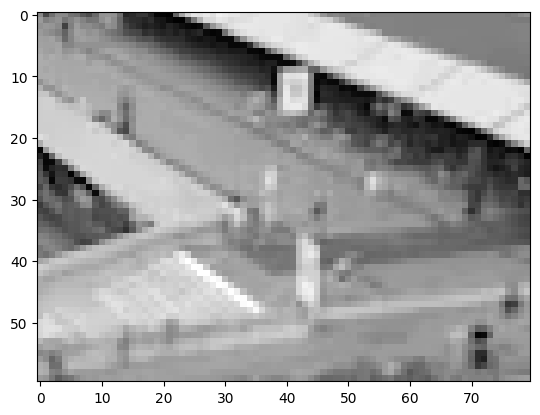

In [31]:
new_frame = remaining[-1].reshape(size_w*size_h)
plt.imshow(new_frame.reshape(size_w, size_h), cmap='gray');

In [32]:
r = 2 #–Ω—É–∂–Ω—ã–π –Ω–∞–º —Ä–∞–Ω–≥

U_2 = np.linalg.svd(M2, full_matrices=False)[0][:, :r]
S_2 = np.linalg.svd(M2, full_matrices=False)[1][:r]
VT_2 = np.linalg.svd(M2, full_matrices=False)[2][:r, :]

In [33]:
def project_new_frames(U, S, VT, new_frames):
    return U @ (U.T @ new_frames)

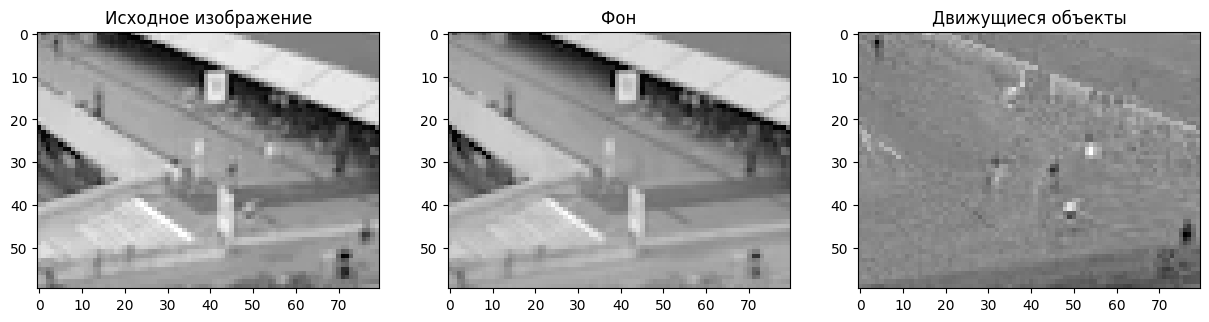

In [34]:
new_frame_proj = project_new_frames(U_2, S_2, VT_2, new_frame)

_, axs = plt.subplots(1,3, figsize=(15,10))
axs[0].imshow(new_frame.reshape(size_w, size_h), cmap='gray')
axs[0].set_title("–ò—Å—Ö–æ–¥–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ")
axs[1].imshow(new_frame_proj.reshape(size_w, size_h), cmap='gray')
axs[1].set_title("–§–æ–Ω")
axs[2].imshow((new_frame - new_frame_proj).reshape(size_w, size_h), cmap='gray')
axs[2].set_title("–î–≤–∏–∂—É—â–∏–µ—Å—è –æ–±—ä–µ–∫—Ç—ã");

2. **(5 –±–∞–ª–ª–æ–≤)** –ò—Å–ø–æ–ª—å–∑—É—è [np.concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) –¥–æ–±–∞–≤—å—Ç–µ –∫–∞–¥—Ä—ã –∏–∑ remaining –∫ —Å—Ç–æ–ª–±—Ü–∞–º M2, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å –º–∞—Ç—Ä–∏—Ü—É –ø–æ–ª–Ω–æ–≥–æ –≤–∏–¥–µ–æ M_full. –ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ –ø—Ä–µ–æ–±—Ä–∞–∑—É–π—Ç–µ —Ç—Ä–µ—Ö–º–µ—Ä–Ω—ã–π –º–∞—Å—Å–∏–≤ remaining –≤ –º–∞—Ç—Ä–∏—Ü—É —Ñ–æ—Ä–º–∞—Ç–µ (size_h * size_w x remaining_nframes). –°–ø—Ä–æ–µ—Ü–∏—Ä—É–π—Ç–µ –≤—Å–µ –∫–∞–¥—Ä—ã (—Å—Ç–æ–ª–±—Ü—ã) —ç—Ç–æ–π –º–∞—Ç—Ä–∏—Ü—ã –∏ –ø—Ä–µ–æ–±—Ä–∞–∑—É–π—Ç–µ –º–∞—Ç—Ä–∏—Ü—É –æ–±—Ä–∞—Ç–Ω–æ –≤ –≤–∏–¥–µ–æ.


In [35]:
remaining_nframes, size_w, size_h = remaining.shape
M_remaining = np.reshape(remaining, (remaining_nframes, size_h * size_w)).T
M_full = np.concatenate((M2, M_remaining), axis=1)

In [36]:
M_proj = project_new_frames(U_2, S_2, VT_2, M_full)

video2_svd = M_to_video(M_full - M_proj, 20, size_w, size_h)
video2_svd.ipython_display(width=300, maxduration=250, fps=20)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


3. **(2 –±–∞–ª–ª–∞)** –ö–∞–∫ –≥–æ–≤–æ—Ä–∏–ª–æ—Å—å –≤—ã—à–µ, –º–æ–∂–Ω–æ —Å—ç–∫–æ–Ω–æ–º–∏—Ç—å –º–Ω–æ–≥–æ —Ä–µ—Å—É—Ä—Å–æ–≤ —Å –ø–æ–º–æ—â—å—é —Ä–∞–Ω–¥–æ–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ SVD –∞–ª–≥–æ—Ä–∏—Ç–º–∞. –†–∞—Å—Å–º–æ—Ç—Ä–∏—Ç–µ –∞–Ω–∞–ª–æ–≥–∏—á–Ω—É—é –æ—Ä—Ç–æ–ø—Ä–æ–µ–∫—Ü–∏—é —Å –ø–æ–º–æ—â—å—é —Ä–∞–Ω–¥–æ–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ SVD —Ä–∞–∑–ª–æ–∂–µ–Ω–∏—è.

In [37]:
def rand_svd(M, r, oversampling=10):
    n = M.shape[1]
    Omega = np.random.randn(n, r + oversampling)
    Y = M @ Omega
    Q, R = np.linalg.qr(Y)
    U, S, Vt = np.linalg.svd(Q.T @ M, full_matrices=False)
    U_approx = Q @ U
    return U_approx[:, :r], S[:r], Vt[:r, :]

In [38]:
r = 2
oversampling = 10

U_2_rand = rand_svd(M2, 2, oversampling=10)[0]
S_2_rand = rand_svd(M2, 2, oversampling=10)[1]
VT_2_rand = rand_svd(M2, 2, oversampling=10)[2]

In [39]:
M_proj_rand = project_new_frames(U_2_rand, S_2_rand, VT_2_rand, M_full)

video2_svd = M_to_video(M_full - M_proj_rand, 20, size_w, size_h)
video2_svd.ipython_display(width=300, maxduration=250, fps=20)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


4. **(3 –±–∞–ª–ª–∞)** –ù–∞–π–¥–∏—Ç–µ $M_{\text{true}}$ - –ª—É—á—à–µ–µ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏–µ 2 —Ä–∞–Ω–≥–∞ –º–∞—Ç—Ä–∏—Ü—ã M2_full —Å –ø–æ–º–æ—â—å—é —á–µ—Å—Ç–Ω–æ–≥–æ SVD (–∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ –∑–∞–¥–∞–Ω–∏—é c). –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—ã–µ —Ç–æ—á–Ω–æ—Å—Ç–∏ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏–π –∏–∑ –ø—É–Ω–∫—Ç–æ–≤ 2 –∏ 3; —Å—Ä–∞–≤–Ω–∏—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ –≤–∏–¥–µ–æ. –ö–∞–∫–∏–µ –≤—ã–≤–æ–¥—ã –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –ø–æ –∫–∞—á–µ—Å—Ç–≤—É –≤–∏–¥–µ–æ –∏ –∏—Ç–æ–≥–æ–≤—ã–º –æ—à–∏–±–∫–∞–º?

$$
    \dfrac{\| M_{\text{true}} - M_{\text{proj}} \|_F}{\| M_{\text{true}} \|_{F}};\quad
    \dfrac{\| M_{\text{true}} - M_{\text{proj rand}} \|_F}{\| M_{\text{true}} \|_{F}}
$$

In [40]:
M_true = trunc_svd(M_full, 2)[0]

video2_svd = M_to_video(M_full - M_true, 20, size_w, size_h)
video2_svd.ipython_display(width=300, maxduration=250, fps=20)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [41]:
rel_error_proj = np.linalg.norm(M_true - M_proj, ord='fro') / np.linalg.norm(M_true, ord='fro')
rel_error_proj_rand = np.linalg.norm(M_true - M_proj_rand, ord='fro') / np.linalg.norm(M_true, ord='fro')

In [42]:
print(f'–û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ (—Ç–æ—á–Ω–æ—Å—Ç—å) –¥–ª—è –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è —á–µ—Ä–µ–∑ SVD - {rel_error_proj}')
print(f'–û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ (—Ç–æ—á–Ω–æ—Å—Ç—å) –¥–ª—è —Ä–∞–Ω–¥–æ–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è - {rel_error_proj_rand}')

–û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ (—Ç–æ—á–Ω–æ—Å—Ç—å) –¥–ª—è –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è —á–µ—Ä–µ–∑ SVD - 0.020001445065678084
–û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ (—Ç–æ—á–Ω–æ—Å—Ç—å) –¥–ª—è —Ä–∞–Ω–¥–æ–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è - 0.03073209709173418


In [50]:
M_rand = rand_svd(M_full, 2)[0]

video2_svd = M_to_video(M_full - M_rand, 20, size_w, size_h)
video2_svd.ipython_display(width=300, maxduration=250, fps=20)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


**–í—ã–≤–æ–¥—ã:**

–ò–∑-–∑–∞ —Å–ª—É—á–∞–π–Ω–æ—Å—Ç–∏ –≤ –≤—ã–±–æ—Ä–µ –ø–æ–¥–ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞ –∏ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω–æ–≥–æ —á–∏—Å–ª–∞ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ (oversampling) —Ä–∞–Ω–¥–æ–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–π SVD –º–æ–∂–µ—Ç —á—É—Ç—å —Ö—É–∂–µ –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç—å –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –ø–æ–¥–ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ, —á—Ç–æ –ø—Ä–∏–≤–æ–¥–∏—Ç –∫ –Ω–µ–º–Ω–æ–≥–æ –±–æ–ª—å—à–µ–π –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ–π –æ—à–∏–±–∫–µ.

–ö–∞—á–µ—Å—Ç–≤–æ –≤–∏–¥–µ–æ –∂–µ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å (–ª–∏—à—å –¥–≤–∏–∂—É—â–∏–µ—Å—è –æ–±—ä–µ–∫—Ç—ã –∏–∑ rand_svd –ø–µ—Ä–µ–æ–¥–∏—á–µ—Å–∫–∏ —Ç—É—Å–∫–Ω–µ—é—Ç, –≤ —Ç–æ –≤—Ä–µ–º—è –∫–∞–∫ –∏–∑ trunc_svd —è—Ä–∫–æ—Å—Ç—å –¥–≤–∏–∂—É—â–µ–≥–æ—Å—è –æ–±—ä–µ–∫—Ç–∞ –ø–æ—Å—Ç–æ—è–Ω–Ω–∞—è), —á—Ç–æ –∏ –≥–æ–≤–æ—Ä–∏—Ç –æ —Å–æ–≤—Å–µ–º –º–∞–ª–æ–π —Ä–∞–∑–Ω–∏—Ü–µ –≤ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—à–∏–±–∫–∞—Ö.

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —Ä–∞–∑–Ω–∏—Ü–∞ –≤ –æ—à–∏–±–∫–∞—Ö –æ—Ç—Ä–∞–∂–∞–µ—Ç –∫–æ–º–ø—Ä–æ–º–∏—Å—Å –º–µ–∂–¥—É –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω–æ–π —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å—é –∏ —Ç–æ—á–Ω–æ—Å—Ç—å—é: –ø–æ–ª–Ω—ã–π SVD —Ç–æ—á–Ω–µ–µ, –∞ —Ä–∞–Ω–¥–æ–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º –±—ã—Å—Ç—Ä–µ–µ, –Ω–æ –ø—Ä–∏ —ç—Ç–æ–º –º–æ–∂–µ—Ç –¥–æ–ø—É—Å–∫–∞—Ç—å –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–µ —É–≤–µ–ª–∏—á–µ–Ω–∏–µ –æ—à–∏–±–∫–∏.

### e. Robust PCA (5 –±–∞–ª–ª–æ–≤)

–ó–∞–º–µ—Ç–∏–º, —á—Ç–æ –º–∞—Ç—Ä–∏—Ü—É $M$ –º–æ–∂–Ω–æ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–Ω–æ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç—å –≤ –≤–∏–¥–µ $M = L + S$, –≥–¥–µ $L$ - –º–∞–ª–æ—Ä–∞–Ω–≥–æ–≤–∞—è –º–∞—Ç—Ä–∏—Ü–∞, –∞ $S$ - —Ä–∞–∑—Ä–µ–∂–µ–Ω–Ω–∞—è (—Ç–æ –µ—Å—Ç—å —Å–æ–¥–µ—Ä–∂–∞—â–∞—è –±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω—É–ª–µ–π). –î–ª—è –ø–æ–∏—Å–∫–∞ $L$ –∏ $S$ –º—ã –º–æ–≥–ª–∏ –±—ã –ø–æ–ø—ã—Ç–∞—Ç—å—Å—è —Ä–µ—à–∏—Ç—å –∑–∞–¥–∞—á—É

$$
    \mathrm{rank}(L) + \alpha\ \mathrm{nnz}(S) \to \min_{L,S}, \quad \alpha > 0
$$

–ø—Ä–∏ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–∏ $M = L + S$, –≥–¥–µ $\mathrm{nnz}(S)$ –æ–±–æ–∑–Ω–∞—á–µ—Ç —á–∏—Å–ª–æ –Ω–µ–Ω—É–ª–µ–≤—ã—Ö —ç–ª–µ–º–µ–Ω—Ç–æ–≤ (<b>n</b>umber of <b>n</b>on<b>z</b>eros).
–û–¥–Ω–∞–∫–æ —Ç–∞–∫—É—é –∑–∞–¥–∞—á—É —Ä–µ—à–∞—Ç—å –∫—Ä–∞–π–Ω–µ —Å–ª–æ–∂–Ω–æ –∏–∑-–∑–∞ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—è –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–æ—Å—Ç–∏ –∏ –≤—ã–ø—É–∫–ª–æ—Å—Ç–∏.
–ü–æ—ç—Ç–æ–º—É –æ–±—ã—á–Ω–æ –µ–µ [–∑–∞–º–µ–Ω—è—é—Ç –Ω–∞ –±–æ–ª–µ–µ –ø—Ä–æ—Å—Ç—É—é](https://arxiv.org/pdf/0912.3599.pdf):

$$
    \|L\|_* + \alpha \|S\|_{\mathrm{sum}} \to \min_{L, S}, \quad \alpha > 0,
$$

–≥–¥–µ $\|\cdot\|_*$ –æ–±–æ–∑–Ω–∞—á–∞–µ—Ç —è–¥–µ—Ä–Ω—É—é –Ω–æ—Ä–º—É –º–∞—Ç—Ä–∏—Ü—ã, –∞ $\|\cdot\|_{\mathrm{sum}}$ —è–≤–ª—è–µ—Ç—Å—è —Å—É–º–º–æ–π –º–æ–¥—É–ª–µ–π –≤—Å–µ—Ö —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –º–∞—Ç—Ä–∏—Ü—ã ($\ell_1$-–Ω–æ—Ä–º–∞).

–î–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è robust PCA —Å–∫–∞—á–∞–µ–º –∫–æ–¥ –ø–æ —Å—Å—ã–ª–∫–µ [https://github.com/dganguli/robust-pca](https://github.com/dganguli/robust-pca) –∏ –∏–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –µ–≥–æ:

In [44]:
# –ï—Å–ª–∏ –≤—ã —Ä–∞–±–æ—Ç–∞–µ—Ç–µ –Ω–∞ windows - —Å–∫–∞—á–∏–≤–∞–π—Ç–µ —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ
!wget https://raw.githubusercontent.com/dganguli/robust-pca/master/r_pca.py
import r_pca

--2025-02-26 14:29:48--  https://raw.githubusercontent.com/dganguli/robust-pca/master/r_pca.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3105 (3.0K) [text/plain]
Saving to: ‚Äòr_pca.py‚Äô

r_pca.py            100%[===================>]   3.03K  --.-KB/s    in 0s      

2025-02-26 14:29:49 (42.9 MB/s) - ‚Äòr_pca.py‚Äô saved [3105/3105]



–ú—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∏ –∫–ª–∞—Å—Å ```R_pca``` –∏ –∑–∞–ø—É—Å—Ç–∏–ª–∏ —Ñ—É–Ω–∫—Ü–∏—é ```fit(max_iter=4000, iter_print=100)``` –¥–ª—è –Ω–∞—Ö–æ–∂–¥–µ–Ω–∏—è –º–∞—Ç—Ä–∏—Ü $L$ –∏ $S$ –ø–æ –º–∞—Ç—Ä–∏—Ü–µ $M$ –∏–∑ –ø—É–Ω–∫—Ç–∞ a).

1. **(5 –±–∞–ª–ª–æ–≤)** –° –ø–æ–º–æ—â—å—é ```plt.imshow(..., cmap='gray')``` –ø–æ—Å—Ç—Ä–æ–π—Ç–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –ø–µ—Ä–≤–æ–≥–æ –∫–∞–¥—Ä–∞
    - –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –≤–∏–¥–µ–æ,
    - —Ñ–æ–Ω–∞,
    - –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –ª—é–¥–µ–π.

–û–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ, —á—Ç–æ –Ω–∞ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –º–µ—Ç–æ–¥ –º–æ–∂–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å –¥–æ–≤–æ–ª—å–Ω–æ –¥–æ–ª–≥–æ (–≤–µ—Ä–æ—è—Ç–Ω–æ, —á–∞—Å—ã). –ü–æ—ç—Ç–æ–º—É –ø—Ä–µ–¥–ª–∞–≥–∞–µ—Ç—Å—è –≤–∑—è—Ç—å —Ç–æ–ª—å–∫–æ —á–µ—Ç–≤–µ—Ä—Ç—å –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞, –∞ —Ç–∞–∫–∂–µ –≤—ã—Ä–µ–∑–∞—Ç—å –∫–∞–∂–¥—ã–π –≤—Ç–æ—Ä–æ–π –∫–∞–¥—Ä. –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –≤–∏–¥–µ–æ —Å –Ω–∏–∑–∫–∏–º —Ä–∞–∑—Ä–µ—à–µ–Ω–∏–µ–º –∏–∑ –ø—É–Ω–∫—Ç–∞ a).

iteration: 1, error: 10.068199117424792
iteration: 100, error: 0.7004423976779164
iteration: 200, error: 0.42632079958320696
iteration: 300, error: 0.28615543342340466
iteration: 400, error: 0.19763762992272108
iteration: 500, error: 0.1491945130599695
iteration: 600, error: 0.1197776098481122
iteration: 700, error: 0.10258379675908802
iteration: 800, error: 0.08740324618615974
iteration: 900, error: 0.07772202053909959
iteration: 1000, error: 0.06319242183847977
iteration: 1100, error: 0.05727756160922441
iteration: 1200, error: 0.04361963207391365
iteration: 1300, error: 0.04277918295975366
iteration: 1400, error: 0.028313363611467284
iteration: 1500, error: 0.028215592055600716
iteration: 1546, error: 0.01770345281066796


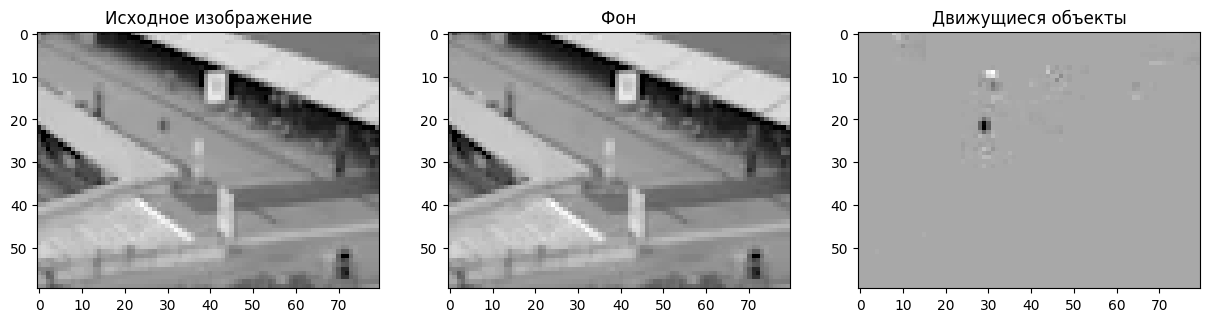

In [45]:
Mt = M[:,:M.shape[1]//4:2]
solver = r_pca.R_pca(Mt, mu=0.68) # –≤ –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ —Ç–∞–∫–æ–π mu —Ä–∞–±–æ—Ç–∞–µ—Ç –ª—É—á—à–µ –∏—Å—Ö–æ–¥–Ω–æ–≥–æ
L, S = solver.fit(max_iter=4000, iter_print=100)

_, axs = plt.subplots(1,3, figsize=(15,10))
axs[0].imshow(Mt[:, 0].reshape(size_w, size_h), cmap='gray')
axs[0].set_title("–ò—Å—Ö–æ–¥–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ")
axs[1].imshow(L[:, 0].reshape(size_w, size_h), cmap='gray')
axs[1].set_title("–§–æ–Ω")
axs[2].imshow(S[:, 0].reshape(size_w, size_h), cmap='gray')
axs[2].set_title("–î–≤–∏–∂—É—â–∏–µ—Å—è –æ–±—ä–µ–∫—Ç—ã");

–ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ –º–æ–∂–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ –≤–∏–¥–µ–æ –¥–≤–∏–∂—É—â–∏—Ö—Å—è –æ–±—ä–µ–∫—Ç–æ–≤:

In [46]:
video_rpca = M_to_video(S, 20, size_w, size_h)
video_rpca.ipython_display(width=300, maxduration=250, fps=20)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


### f. –ë–æ–Ω—É—Å

–í –±–æ–Ω—É—Å–Ω–æ–π —á–∞—Å—Ç–∏ –º—ã –ø–æ–∑–Ω–∞–∫–æ–º–∏–º—Å—è —Å –±–æ–ª–µ–µ –ø—Ä–æ–¥–≤–∏–Ω—É—Ç—ã–º–∏ —Ä–∞–Ω–¥–æ–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –∞–ª–≥–æ—Ä–∏—Ç–º–∞–º–∏ –ø–æ–∏—Å–∫–∞ —Å–∏–Ω–≥—É–ª—è—Ä–Ω–æ–≥–æ —Ä–∞–∑–ª–æ–∂–µ–Ω–∏—è. –£—Å–ª–æ–≤–∏–µ –∑–∞–¥–∞–Ω–∏–π –±–∞–∑–∏—Ä—É–µ—Ç—Å—è –Ω–∞ —Å—Ç–∞—Ç—å–µ

Halko, Nathan, Per-Gunnar Martinsson, and Joel A. Tropp. "Finding structure with randomness: Probabilistic algorithms for constructing approximate matrix decompositions." SIAM review 53.2 (2011): 217-288.

**–°—Å—ã–ª–∫–∞ –Ω–∞ —Å—Ç–∞—Ç—å—é**: http://users.cms.caltech.edu/~jtropp/papers/HMT11-Finding-Structure-SIREV.pdf

1. **(50 –±. –±–∞–ª–ª–æ–≤)** –î–æ–∫–∞–∂–∏—Ç–µ, —á—Ç–æ –≤ —Ç–æ—á–Ω–æ–π –∞—Ä–∏—Ñ–º–µ—Ç–∏–∫–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç, –ø–æ–ª—É—á–µ–Ω–Ω—ã–π –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –ê–ª–≥–æ—Ä–∏—Ç–º–∞ 4.3 –∏ 4.4 –∏–∑ —Å—Ç–∞—Ç—å–∏, —É–∫–∞–∑–∞–Ω–Ω–æ–π –≤—ã—à–µ, —Å–æ–≤–ø–∞–¥–∞—é—Ç. –í—Å–µ —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏–µ –≤—ã–∫–ª–∞–¥–∫–∏ –ø—Ä–∏–≤–µ–¥–∏—Ç–µ –≤ —Ç–µ–∫—É—â–µ–º —Ñ–∞–π–ª–µ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º Markdown –∏–ª–∏ –ø—Ä–∏–∫—Ä–µ–ø–∏—Ç–µ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ —Ä—É–∫–æ–ø–∏—Å–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç–∞.

2. **(50 –±. –±–∞–ª–ª–æ–≤)** –†–µ–∞–ª–∏–∑—É–π—Ç–µ –ê–ª–≥–æ—Ä–∏—Ç–º 4.4 –∏ –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ –µ–≥–æ –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –ø—Ä–∏–±–ª–∏–∂–µ–Ω–Ω–æ–≥–æ —Å–∏–Ω–≥—É–ª—è—Ä–Ω–æ–≥–æ —Ä–∞–∑–ª–æ–∂–µ–Ω–∏—è –º–∞—Ç—Ä–∏—Ü—ã A –Ω–∞ –º–∞—Ç—Ä–∏—Ü–µ –∏–∑ —ç—Ç–æ–π –î–ó. –ó–∞—Ñ–∏–∫—Å–∏—Ä—É–π—Ç–µ —Ä–∞–Ω–≥–∏ $r=5, 20, 50$. –î–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑ —ç—Ç–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –Ω–∞ –æ–¥–Ω–æ–º —Ä–∏—Å—É–Ω–∫–µ –ø–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –Ω–æ—Ä–º—ã (–Ω–∞ –≤—ã–±–æ—Ä) —Ä–∞–∑–Ω–æ—Å—Ç–∏ –ø–æ–ª—É—á–µ–Ω–Ω–æ–≥–æ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è –∏ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è (–≤ –≤—ã–±—Ä–∞–Ω–Ω–æ–π –Ω–æ—Ä–º–µ) —Ç–æ–≥–æ –∂–µ —Ä–∞–Ω–≥–∞ –æ—Ç —á–∏—Å–ª–∞ q.